## Problem 6

In [9]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

*** No CODEPAGE record, no encoding_override: will use 'ascii'
[175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175
 175 175 175 175 175 175 175]
[175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175
 175 175 175 175 175 175 175]
[175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175 175
 175 175 175 175 175 175 175]


c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linea

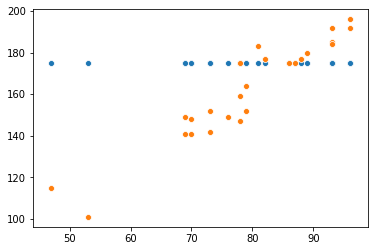

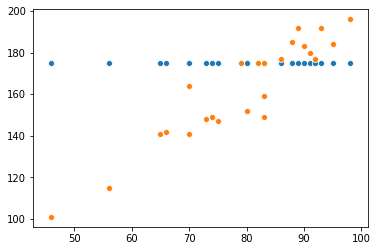

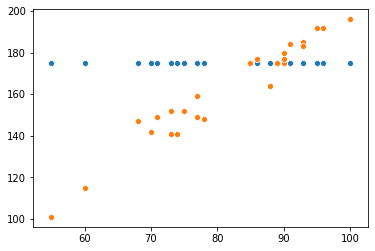

In [6]:
# Load data
data = pandas.read_excel('data.xls')

X1 = data.to_numpy()[:, 0].reshape(-1, 1)
X2 = data.to_numpy()[:, 1].reshape(-1, 1)
X3 = data.to_numpy()[:, 2].reshape(-1, 1)
y = data.to_numpy()[:, 3]

# Iterate through different X values and fit linear predictors based off of them
for X in [X1, X2, X3]:
    model = LogisticRegression()
    model.fit(X, y)
    
    y_predict = model.predict(X)
    print(y_predict)

    plt.figure()
    sns.scatterplot(X[:, 0], y_predict)
    sns.scatterplot(X[:, 0], y)


### Problem 6B

In [10]:
# Iterate through different X values and fit linear predictors based off of them
X1X2 = data.to_numpy()[:, 0:2]
X1X3 = data.to_numpy()[:, 0:3:2]
X2X3 = data.to_numpy()[:, 1:3]

# print(X1X2)
# print(X1X3)
# print(X2X3)

for X in [X1X2, X1X3, X2X3]:
    model = LogisticRegression()
    model.fit(X, y)
    y_predict = model.predict(X)
    print(y_predict)
    print("Residual sum of squares: %.2f"% ((y - y_predict) ** 2).sum()) 
    
print(classification_report(y, y_predict))

[149 175 175 175 175 164 149 115 175 175 175 175 175 175 177 175 175 149
 177 177 177 175 177 149 175]
Residual sum of squares: 12363.00
[175 175 175 175 152 175 175 115 175 175 175 175 192 152 175 175 147 175
 192 192 175 175 175 152 192]
Residual sum of squares: 12253.00
[152 175 177 175 175 175 175 175 175 164 175 175 177 152 175 175 152 175
 152 152 175 175 175 152 175]
Residual sum of squares: 15835.00
              precision    recall  f1-score   support

         101       0.00      0.00      0.00         1
         115       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         2
         142       0.00      0.00      0.00         1
         147       0.00      0.00      0.00         1
         148       0.00      0.00      0.00         1
         149       0.00      0.00      0.00         2
         152       0.33      1.00      0.50         2
         159       0.00      0.00      0.00         1
         164       1.00      1.00      1.00     

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linea

### Problem 6C

In [12]:
X = data.to_numpy()[:, :]
model = LogisticRegression()
model.fit(X, y)
y_predict = model.predict(X)
print(y_predict)
print("Residual sum of squares: %.2f"% ((y - y_predict) ** 2).sum()) 


[149 192 177 141 142 101 149 115 175 164 141 141 152 152 148 175 147 183
 152 152 177 175 175 149 192]
Residual sum of squares: 5079.00


c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
